# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 7
label_name = "stat9"
layers = [n*(n-1)*(n-2)//6, 2]

epochs = 5000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 43.21292370557785
Epoch 1, Loss 42.91856688261032
Epoch 2, Loss 42.55194193124771
Epoch 3, Loss 42.20273756980896
Epoch 4, Loss 41.811567544937134
Epoch 5, Loss 41.3590292930603
Epoch 6, Loss 40.76235890388489
Epoch 7, Loss 40.086378037929535
Epoch 8, Loss 39.32369327545166
Epoch 9, Loss 38.4805708527565
Epoch 10, Loss 37.46568989753723
Epoch 11, Loss 36.3170502781868
Epoch 12, Loss 35.27702447772026
Epoch 13, Loss 33.95567047595978
Epoch 14, Loss 32.805991262197495
Epoch 15, Loss 31.688722550868988
Epoch 16, Loss 30.36211383342743
Epoch 17, Loss 29.412162452936172
Epoch 18, Loss 28.40320646762848
Epoch 19, Loss 27.65694308280945
Epoch 20, Loss 26.95756646990776
Epoch 21, Loss 26.26996010541916
Epoch 22, Loss 25.588034987449646
Epoch 23, Loss 25.240352004766464
Epoch 24, Loss 24.76442512869835
Epoch 25, Loss 24.27298629283905
Epoch 26, Loss 24.064721450209618
Epoch 27, Loss 23.682375639677048
Epoch 28, Loss 23.52914620935917
Epoch 29, Loss 23.177986681461334
Epoch 30, Los

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

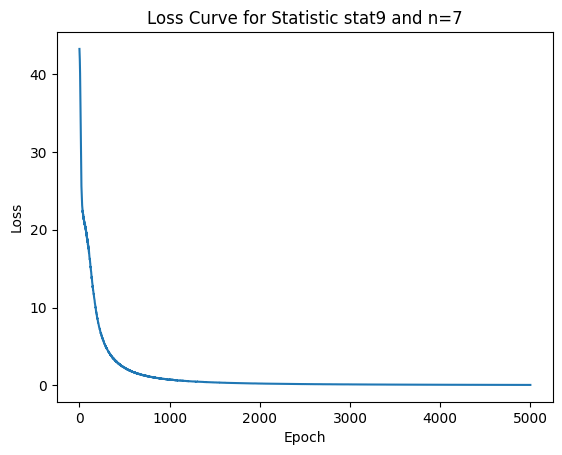

<Figure size 640x480 with 0 Axes>

In [5]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 99.8915636521362%
Accuracy for class 1 = 99.53379953379954%
Overall accuracy = 99.86111111111111%


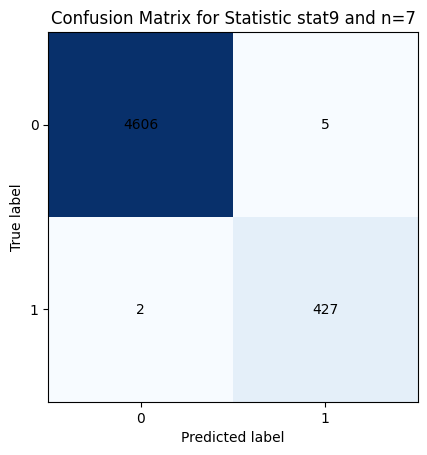

In [6]:
confusion_matrix = evaluate_model(model, full_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

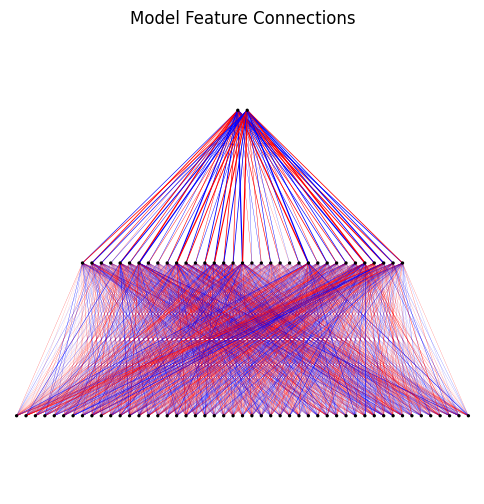

Layer 1


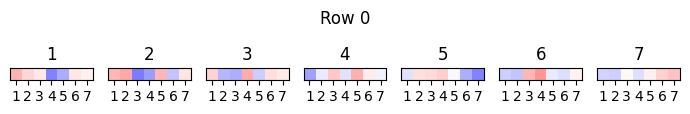

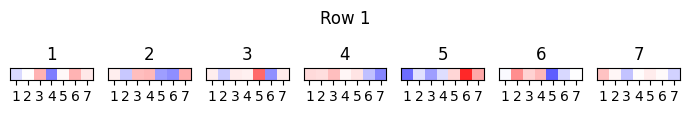

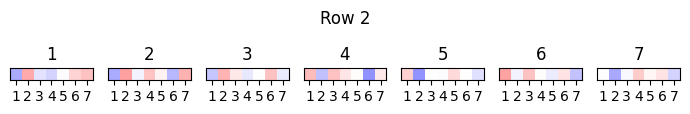

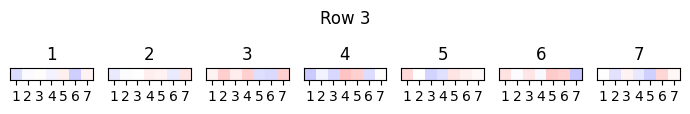

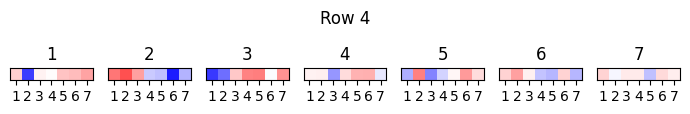

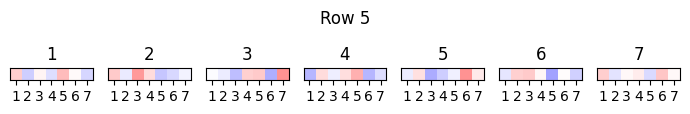

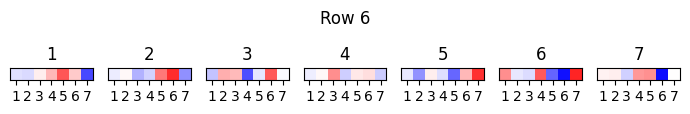

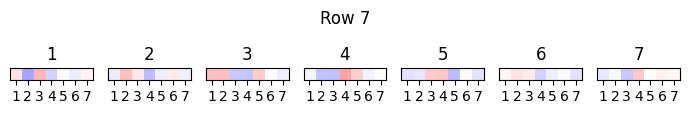

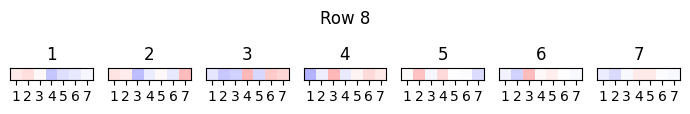

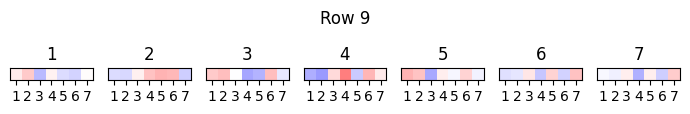

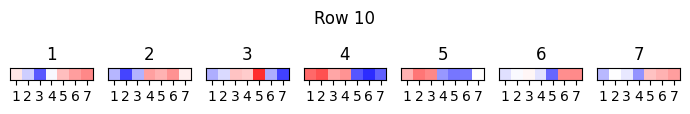

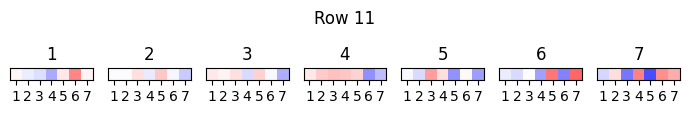

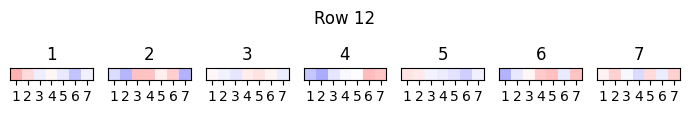

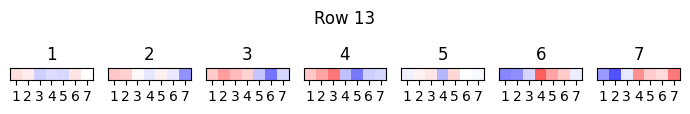

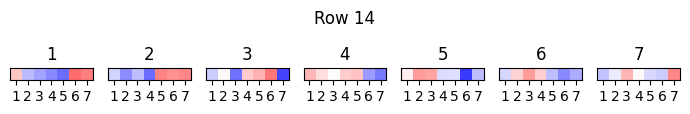

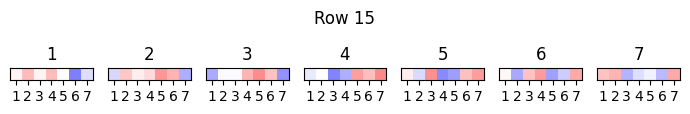

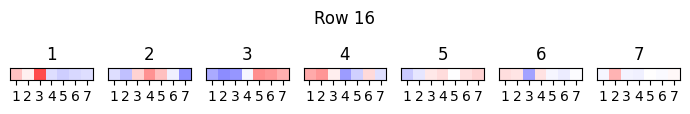

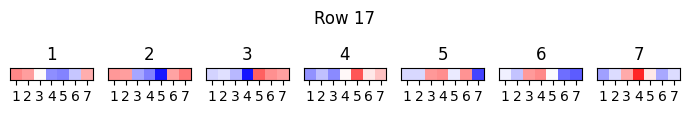

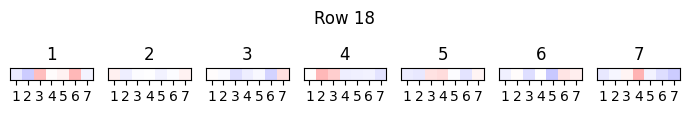

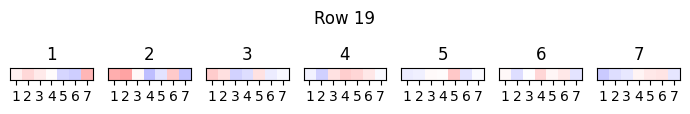

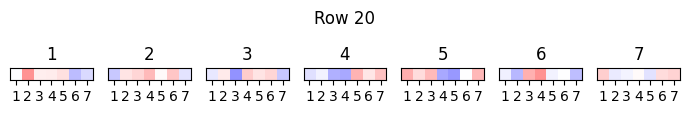

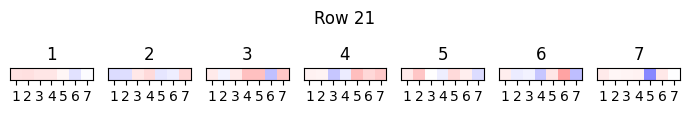

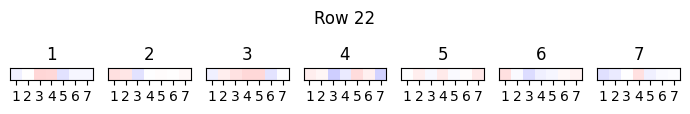

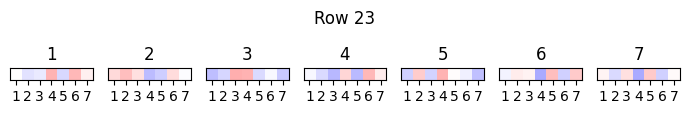

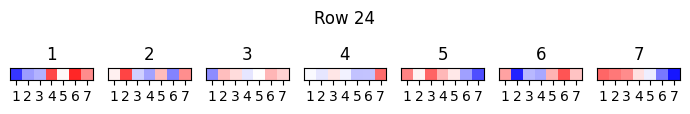

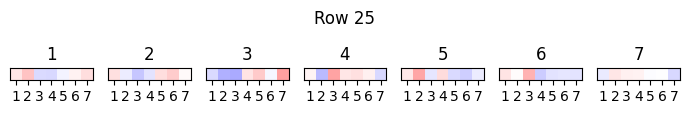

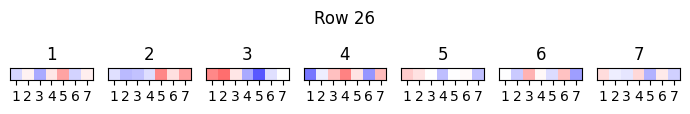

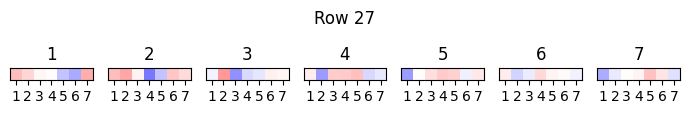

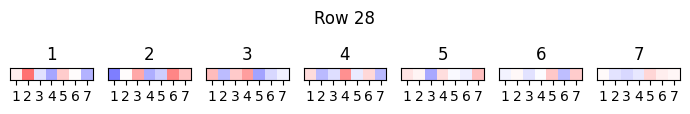

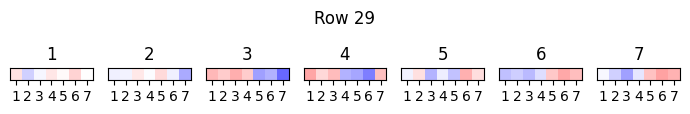

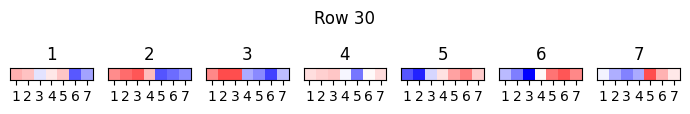

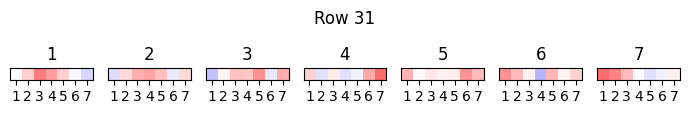

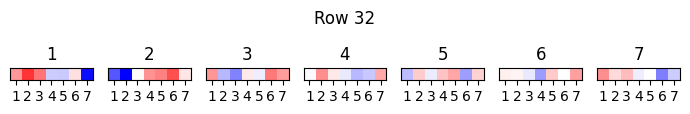

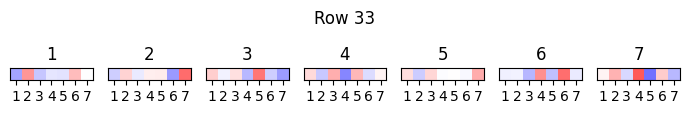

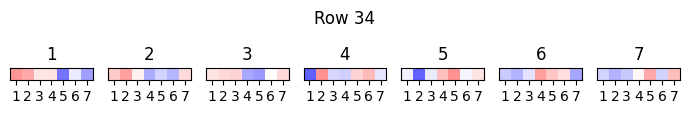

Layer 2


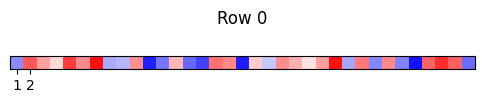

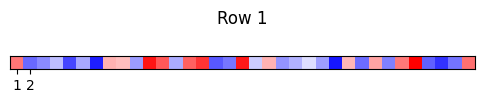

In [7]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)